## Customer Churn Analysis

### Business Understanding

### Problem Statement: Predicting Customer Churn for SyriaTel


### 1. Overview

SyriaTel, a telecommunications company, faces customer churn, where users discontinue their services. High churn rates lead to revenue loss, increased acquisition costs, and lower profitability. Understanding and predicting churn allows SyriaTel to take proactive measures to retain customers, optimize marketing strategies, and improve service offerings.

### 2. Business Problem 

SyriaTel wants to identify customers who are likely to churn in the near future. By accurately predicting churn, the company can take targeted actions such as personalized offers, improved customer service, and technical support to retain these customers.

### 3. Why Machine Learning?

Traditional approaches to reducing churn—such as generalized promotions or mass discounts—are often inefficient and costly. Machine learning enables SyriaTel to:

#### Objectives

- Identify high-risk customers early based on behavioral patterns.
- Pinpoint key churn drivers, such as call patterns, data usage, and customer support interactions.
- Optimize retention strategies by offering personalized incentives only to customers who are at risk.

### 4. Key Stakeholder

The primary stakeholder is SyriaTel’s Customer Retention & Marketing Department, which is responsible for reducing churn and maximizing customer lifetime value. Other relevant stakeholders include:

- Sales & Marketing Team: To design targeted campaigns based on churn predictions.
- Customer Support Team: To enhance service quality for high-risk customers.
- Network Operations Team: To address technical issues leading to churn.\

### 5. Success Metrics

The success of this project will be evaluated based on:

- Model performance: Accuracy, recall, precision, F1-score, and AUC-ROC for churn classification.
- Business impact: Reduction in churn rate after implementing model-driven interventions.
- Cost-effectiveness: Higher ROI from retention efforts by focusing on high-risk customers instead of mass offers.

### Data Understanding

#### 1.0 Import libraries

In [160]:


#Data Manipulation $ Visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

#Modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from imblearn.over_sampling import SMOTE
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

#### 1.1 Load dataset

In [128]:
#Load Data and creating a dataframe
df= pd.read_csv("bigml_59c28831336c6604c800002a.csv")

#checking first five rows
df.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [129]:
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [130]:
df.shape

(3333, 21)

Observation:

   Data is uniform from top to bottom.

   The dataset consists of 3,333 rows and 21 columns. 
           

In [131]:
#check the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [132]:
#check columns
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [133]:
df.describe(include= 'all')

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333,3333.000000,3333.000000,3333,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,NaN,3333,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,401-6977,no,no,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,106,NaN,NaN,1,3010,2411,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,437.182418,NaN,NaN,NaN,8.099010,179.775098,100.435644,30.562307,...,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,42.371290,NaN,NaN,NaN,13.688365,54.467389,20.069084,9.259435,...,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,408.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,408.000000,NaN,NaN,NaN,0.000000,143.700000,87.000000,24.430000,...,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,415.000000,NaN,NaN,NaN,0.000000,179.400000,101.000000,30.500000,...,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,510.000000,NaN,NaN,NaN,20.000000,216.400000,114.000000,36.790000,...,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


In [134]:
#checking the categories for object data types
print(df['international plan'].unique())
print(df['voice mail plan'].unique())
print(df['churn'].unique())

['no' 'yes']
['yes' 'no']
[False  True]


Observation-

The dataset includes categorical and numerical variables.

The target variable is "churn", a boolean column indicating whether a customer churned (True) or not (False).

phone number: which is an identifier, should be dropped for modeling.

### Data Prep

#### 1.0 Data Cleaning

In [135]:
#checking for missing values
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [136]:
#checking for duplicates
df.duplicated().sum()

0

In [137]:
# Remove customer number feature it is contact information on the client and adds no value to the analysis
# Recheck dataframe
df.drop(['phone number'],axis=1,inplace=True)
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [138]:
#checking for outliers
df.skew()

account length            0.096606
area code                 1.126823
number vmail messages     1.264824
total day minutes        -0.029077
total day calls          -0.111787
total day charge         -0.029083
total eve minutes        -0.023877
total eve calls          -0.055563
total eve charge         -0.023858
total night minutes       0.008921
total night calls         0.032500
total night charge        0.008886
total intl minutes       -0.245136
total intl calls          1.321478
total intl charge        -0.245287
customer service calls    1.091359
churn                     2.018356
dtype: float64

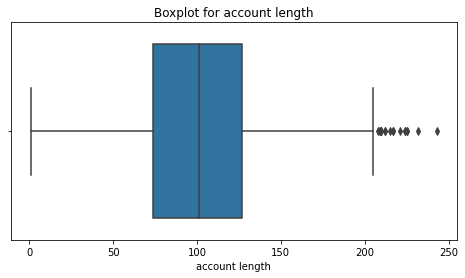

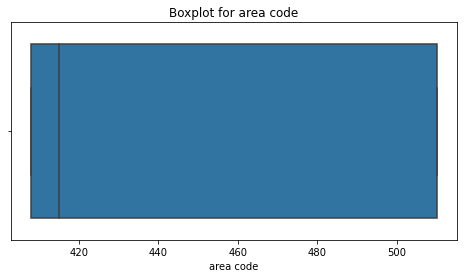

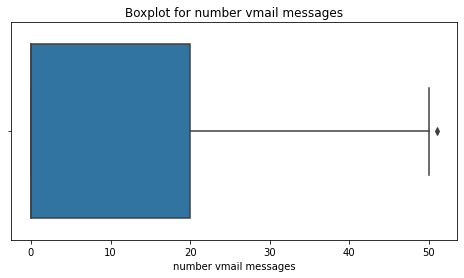

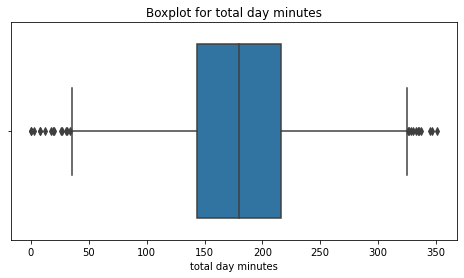

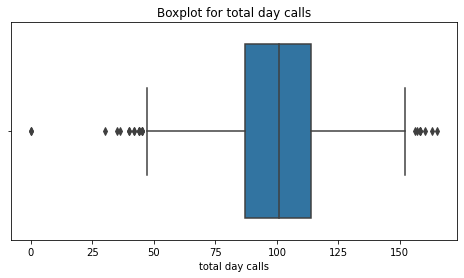

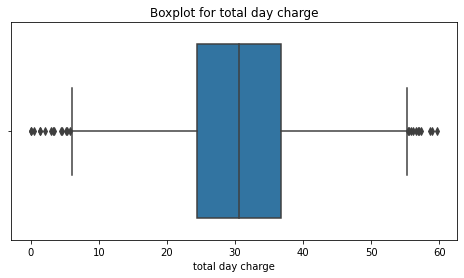

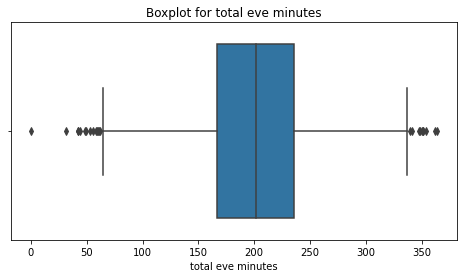

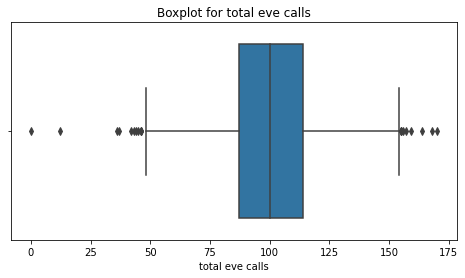

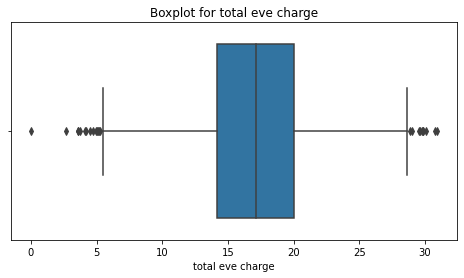

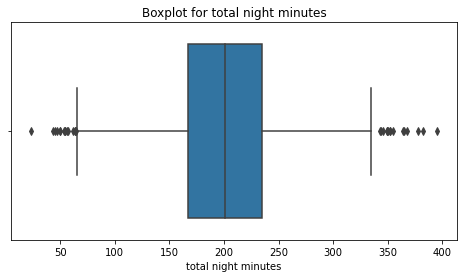

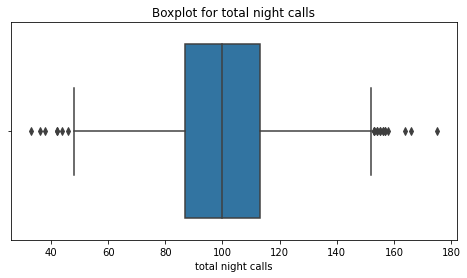

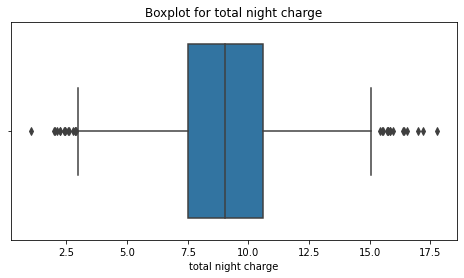

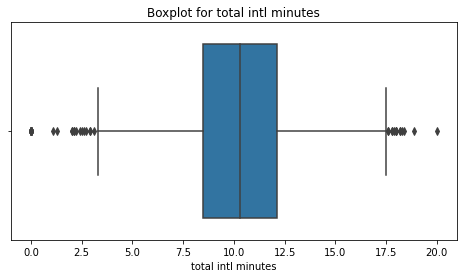

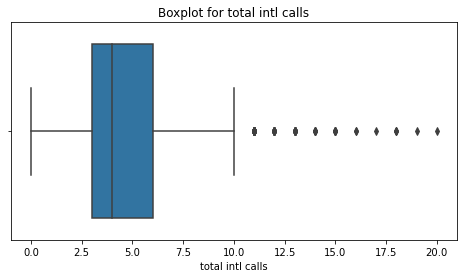

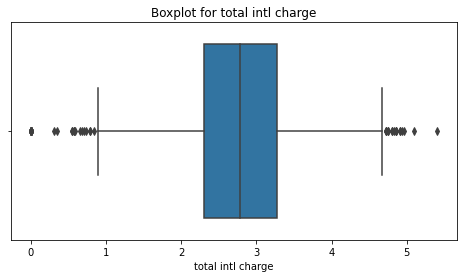

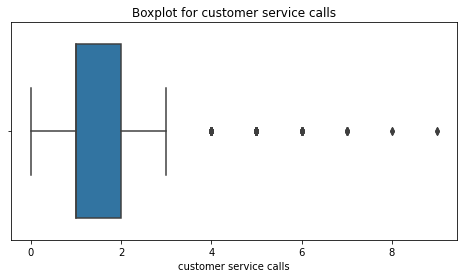

In [139]:
#visualize the outliers
for col in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8, 4)) 
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

In [140]:
#remove the outliers using Interquartile Range
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_cleaned.to_csv("cleaned_dataset.csv", index=False)


In [141]:
df1=pd.read_csv("cleaned_dataset.csv")
df1.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
4,AL,118,510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False


In [142]:
df1.shape

(2499, 20)

Obsevation-
Removing Outliers affects the dataset by removing important data, thus i proceed with the original dataset

### EDA

### Analysis on 'churn' Feature
* Churn will be used as the dependent variable in this analysis.
* Churn indicates if a customer has terminated their contract with SyriaTel. True indicates they have terminated and false indicates they have not  and have an existing account. 

False    2850
True      483
Name: churn, dtype: int64


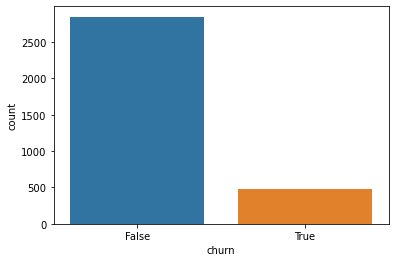

In [143]:
# Countplot of churn feature
print(df.churn.value_counts())
sns.countplot(data=df, x='churn');

* Of the 3,333 customers in the dataset, 483 have terminated their contract with SyriaTel. That is 14.5% of customers lost. 
* The distribution of the binary classes shows a data imbalance. This needs to be addressed before modeling as an unbalanced feature can cause the model to make false predictions.

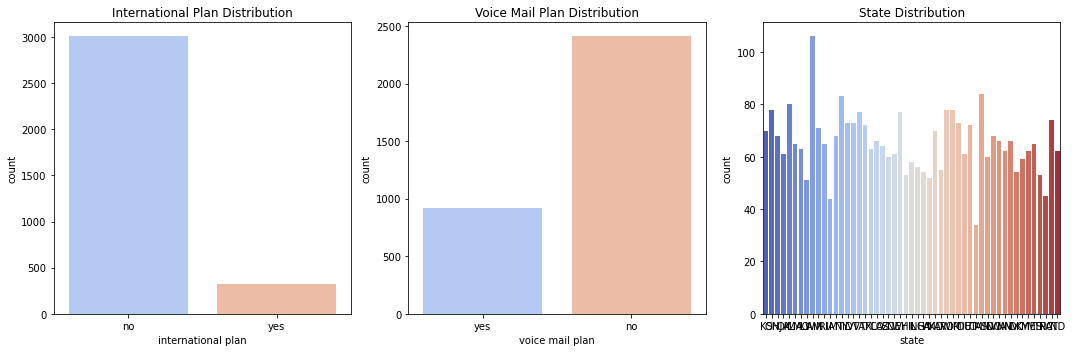

In [144]:
# Univariate Analysis-: Categorical Variables

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot categorical feature distributions
sns.countplot(x="international plan", data=df, ax=axes[0], palette="coolwarm")
sns.countplot(x="voice mail plan", data=df, ax=axes[1], palette="coolwarm")
sns.countplot(x="state", data=df, ax=axes[2], palette="coolwarm")

# Titles
axes[0].set_title("International Plan Distribution")
axes[1].set_title("Voice Mail Plan Distribution")
axes[2].set_title("State Distribution")

plt.tight_layout()
plt.show()




- The plots show the number of customers who have subscribed to an international plan, voice mail plan and number of customers in each state
- If churn is high among customers with an international plan , it may indicate dissatisfaction with international service pricing or quality
- States with a higher customer base,  could be useful for targeted marketing strategies

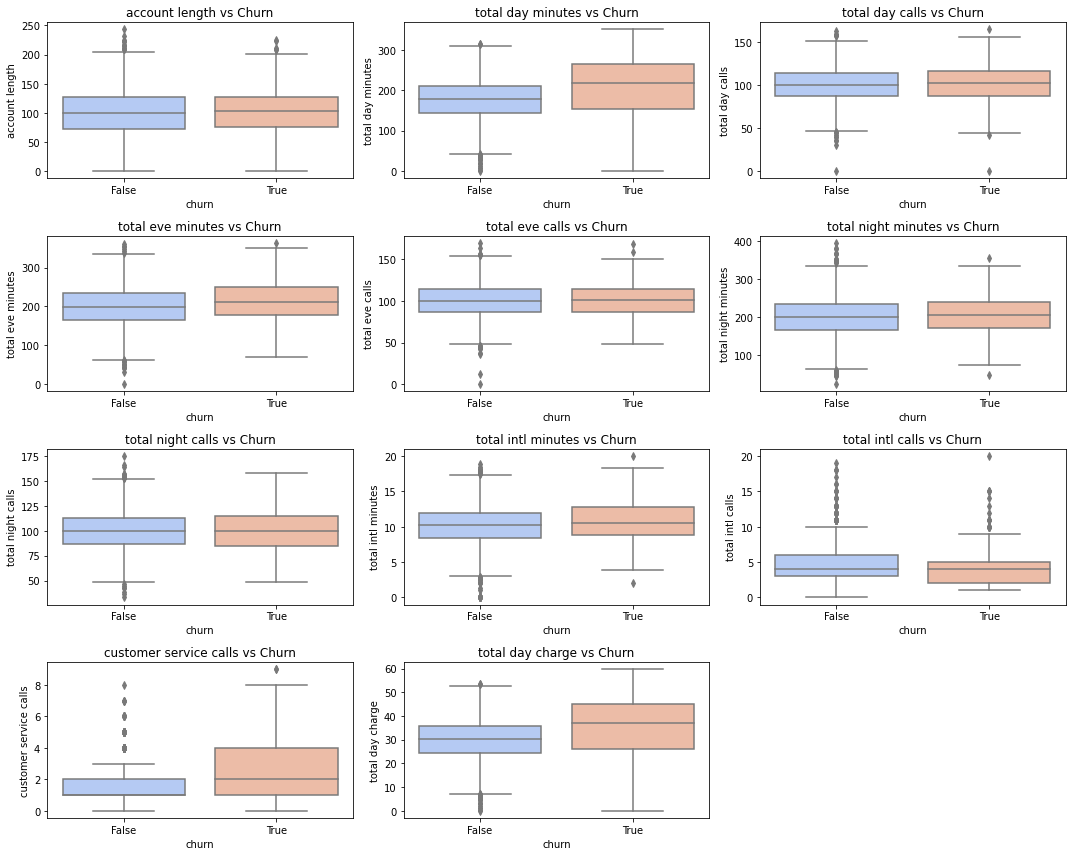

In [145]:
# Bivariate Analysis-: Boxplots of numerical features against churn

num_features = [
    "account length", "total day minutes", "total day calls",
    "total eve minutes", "total eve calls", "total night minutes",
    "total night calls", "total intl minutes", "total intl calls",
    "customer service calls", "total day charge"
]

plt.figure(figsize=(15, 12))
for i, col in enumerate(num_features, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df["churn"], y=df[col], palette="coolwarm")
    plt.title(f"{col} vs Churn")

plt.tight_layout()
plt.show()


- High usage ,especially during the day, may increase churn risk—possibly due to pricing concerns.
- More customer service calls are likely correlated with churn, suggesting dissatisfaction.
- International call patterns may indicate pricing concerns.
- Total day calls may not show a strong correlation with churn.

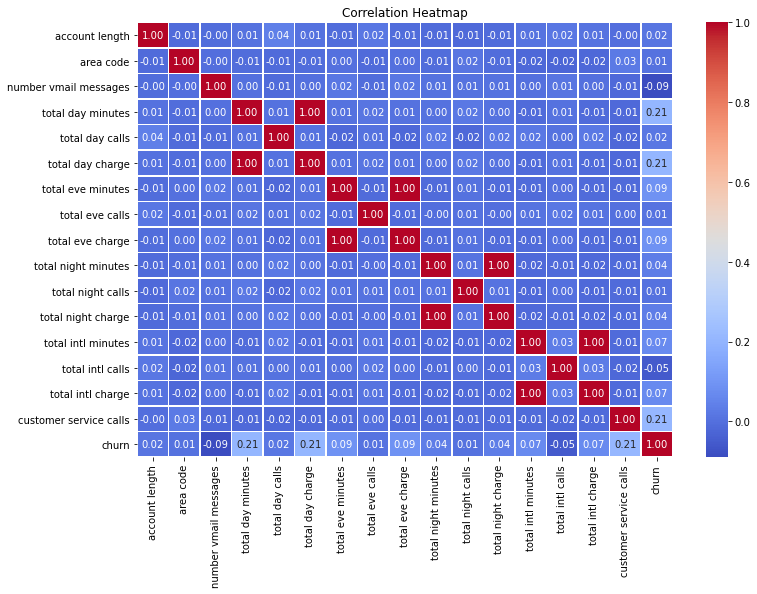

In [146]:
# Multivariate Analysis-: Correlation heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


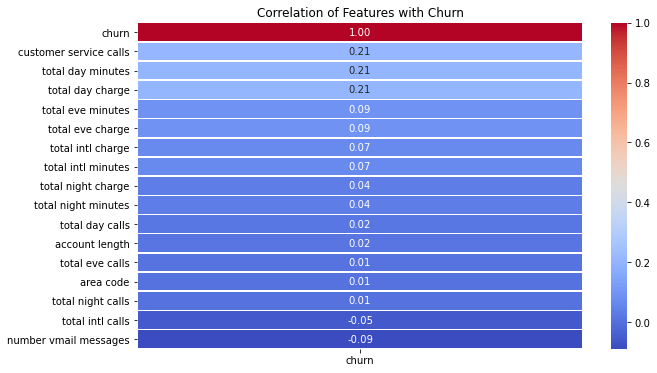

In [147]:
# Compute correlation of all numerical features with churn
correlation_with_churn = df.corr()["churn"].sort_values(ascending=False).to_frame()  

# Create a heatmap
plt.figure(figsize=(10, 6))  
sns.heatmap(correlation_with_churn, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")


plt.title("Correlation of Features with Churn")
plt.show()

- Strong internal correlations exist between total minutes and total charges, indicating redundancy in features.
- Pricing & Service Quality appear to be the biggest churn drivers—customers likely leave due to high costs and unresolved complaints.
- We can clearly state that the following three attributes contribute the most towards deciding whether a person will churn or not:

 -Customer service calls 
 
 -Total day minutes 
 
 -Total day charge

## Data Preprocessing

In [148]:
#Drop highly correlated  features -to prevents data leakage and multicollinearity-
df.drop(columns=["total day charge", "total eve charge", "total night charge", 
                 "total intl charge", "area code", "state"], inplace=True)

In [149]:
df.churn.unique()

array([False,  True])

#### One Hot Encoding

In [150]:
df['churn'] =df['churn'].map({True: 1, False: 0}).astype('int')
df.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,128,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,107,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,137,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,84,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,75,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0


In [151]:
# Convert categorical features
df = pd.get_dummies(df, columns=["international plan", "voice mail plan"], drop_first=True)

In [152]:
df.tail()

,account length,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn,international plan_yes,voice mail plan_yes
3328,192,36,156.2,77,215.5,126,279.1,83,9.9,6,2,0,0,1
3329,68,0,231.1,57,153.4,55,191.3,123,9.6,4,3,0,0,0
3330,28,0,180.8,109,288.8,58,191.9,91,14.1,6,2,0,0,0
3331,184,0,213.8,105,159.6,84,139.2,137,5.0,10,2,0,1,0
3332,74,25,234.4,113,265.9,82,241.4,77,13.7,4,0,0,0,1


#### Scaling Numerical Features

In [153]:
# Normalize numerical features 

scaler = StandardScaler()

numerical_features = [
    "account length", "number vmail messages", "total day minutes", "total day calls",
     "total eve minutes", "total eve calls",
    "total night minutes", "total night calls", 
    "total intl minutes", "total intl calls",  "customer service calls"
]

df[numerical_features] = scaler.fit_transform(df[numerical_features])

#### Handling Class Imbalance for the target variable "Churn"

In [154]:
# Define features and target variable
X = df.drop(columns=["churn"])
y = df["churn"]

In [155]:
# Split the data before applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Class Distribution Before SMOTE: 0    2280
1     386
Name: churn, dtype: int64
Class Distribution After SMOTE: 1    2280
0    2280
Name: churn, dtype: int64


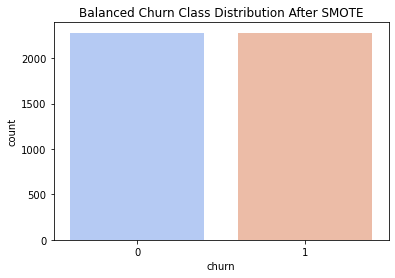

In [156]:
# Apply SMOTE only on training data
smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check new class distribution
print("Class Distribution Before SMOTE:", y_train.value_counts())
print("Class Distribution After SMOTE:", y_train_resampled.value_counts())

#check the visualization for new dustribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_resampled, palette="coolwarm")
plt.title("Balanced Churn Class Distribution After SMOTE")
plt.show()

Observation: Minority class observations have increased balancing the class distribution
    

## Modelling

### Model 1: Logistic Regression Classifier
- Logistic Regression is a simple linear model that performs well when the relationship between features and target is approximately linear.
- It provides probability estimates for churn prediction, making it useful for risk assessment.

In [157]:
# Initialize Logistic Regression
logreg = LogisticRegression(random_state=42)

# Train the model
logreg.fit(X_train_resampled, y_train_resampled)

# Make predictions on test data
y_pred = logreg.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,

              precision    recall  f1-score   support

           0       0.94      0.74      0.83       570
           1       0.32      0.71      0.44        97

    accuracy                           0.73       667
   macro avg       0.63      0.72      0.63       667
weighted avg       0.85      0.73      0.77       667



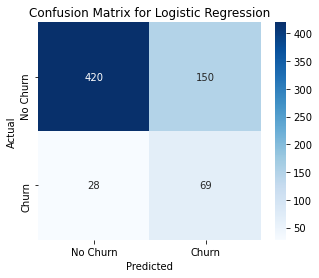

In [158]:
#Model Evaluation

# Classification report
print(classification_report(y_test, y_pred))


# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

- The model correctly predicts 73% of cases overall.However, accuracy alone can be misleading
- The model is very confident when predicting non-churners but sacrifices recall slightly.
- High recall and low precision for Churn means it generates many false positives, flagging customers as potential churners when they aren’t.

- False positives are high, meaning the model incorrectly flags many non-churners as churners.This could lead to wasted resources if a business takes action on these false churn predictions.
- Thus we proceed by conducting hyperparameter tuning and try another model to improve performance

### Model 2: Decision Tree Classifier
- Decision Tree models can capture complex relationships but are prone to overfitting. 
- They provide clear decision rules, making them interpretable but sensitive to noisy data.

#### Hyperparameter Tuning & Model Building

Decision Tree Results:
Best Parameters: {'max_depth': 6, 'min_samples_split': 2}
Accuracy: 0.889055472263868
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.93       570
           1       0.60      0.73      0.66        97

    accuracy                           0.89       667
   macro avg       0.77      0.82      0.80       667
weighted avg       0.90      0.89      0.89       667

--------------------------------------------------


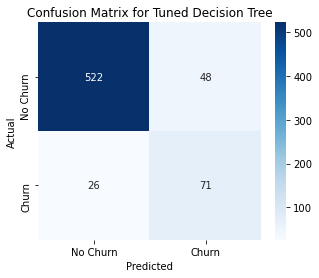

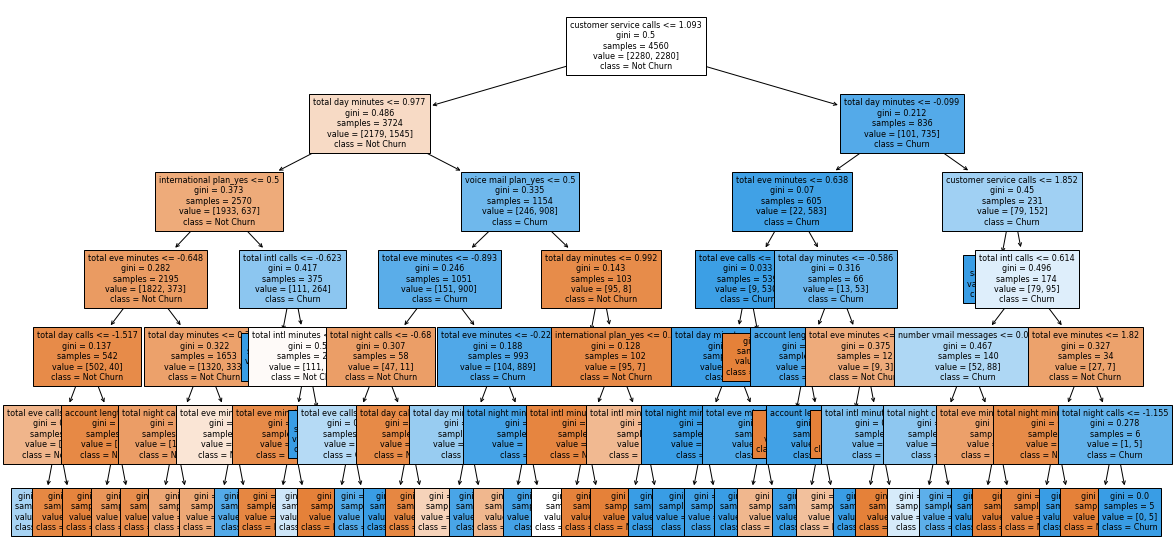

In [159]:
# Define parameter grid
dt_params = {'max_depth': [5, 6, 4], 'min_samples_split': [2, 5, 10]}

# Initialize Decision Tree Classifier
dt= DecisionTreeClassifier(random_state=42)

#grid search
dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='accuracy', n_jobs=-1)
dt_grid.fit(X_train_resampled, y_train_resampled)

#train model
best_dt = dt_grid.best_estimator_

#predictions
y_pred_dt = best_dt.predict(X_test)


print("Decision Tree Results:")

#tuned parameters
print("Best Parameters:", dt_grid.best_params_)

#accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

#classification report
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("-"*50)

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Tuned Decision Tree")
plt.show()

# Visualizing Decision Tree

plt.figure(figsize=(20, 10))
plot_tree(best_dt, feature_names=X_train_resampled.columns, class_names=['Not Churn', 'Churn'], filled=True, fontsize=8)
plt.show()


- The Decision Tree captures more complex patterns in the data, leading to a higher overall accuracy.
- Precision (Churn - 1) increased from 32% to 60% meaning there are Fewer false positives (incorrectly predicting churn).
- F1-score Indicates a better balance in model performance across both classes and a stronger ability to correctly classify customers.

- Recall remains high for churners (**73%**).
-  However the model is prone to overfitting without proper pruning.

### Model 3: Random Forest Classifier
- Random Forest is an ensemble of decision trees that reduces overfitting and improves generalization. 
- It tends to have higher accuracy and robustness compared to individual decision trees.

Random Forest Results:
Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.9085457271364318
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       570
           1       0.68      0.70      0.69        97

    accuracy                           0.91       667
   macro avg       0.81      0.82      0.82       667
weighted avg       0.91      0.91      0.91       667

--------------------------------------------------


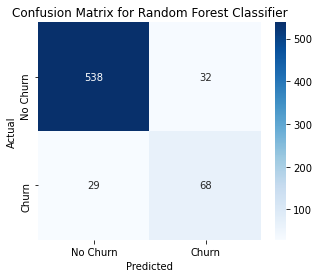

In [161]:
#Define parameters
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20], 'min_samples_split': [2, 5, 10]}

# Initialize Random Forest Classifier
rf= RandomForestClassifier()

##grid search
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train_resampled, y_train_resampled)

#train model
best_rf = rf_grid.best_estimator_

#predictions
y_pred_rf = best_rf.predict(X_test)


print("Random Forest Results:")
print("Best Parameters:", rf_grid.best_params_)

#accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

#classification report
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("-"*50)

#confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()

- Random Forest performed the best, with the highest accuracy and a good balance between precision and recall.
- It reduces overfitting by averaging multiple decision trees.
- Precision for churners improves to 70%, reducing false positives compared to the decision tree.

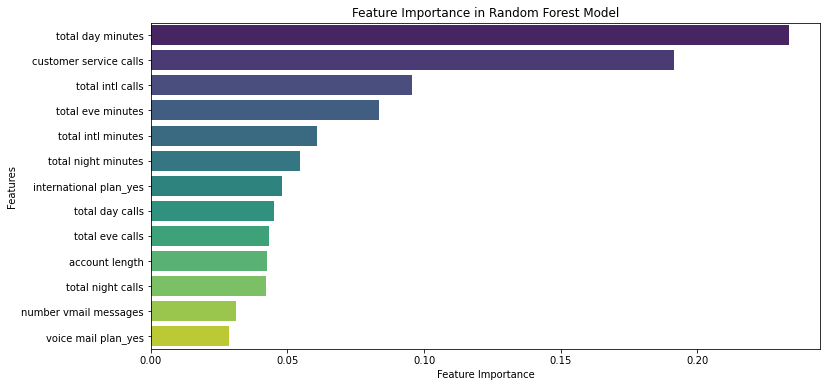

In [162]:
# Visualizing Feature Importance fro the Random Forest Model
plt.figure(figsize=(12, 6))
feature_importances = best_rf.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]


sns.barplot(x=feature_importances[sorted_idx], y=np.array(X_train_resampled.columns)[sorted_idx], palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Model")
plt.show()


- According to the random forest classifier, total day charge, customer service calles and "international plan is yes" features have the highest impact on the model.